In [8]:
import numpy as np
import scipy.io
import psdr

In [17]:
# Import ASAP saved data
dat = scipy.io.loadmat('AS_m10_N1000_pm60pct_QOI2.mat')
ub = dat['ub0'].flatten()
lb = dat['lb0'].flatten()
X0 = dat['X0']
CL = dat['F'].flatten()

In [18]:
dom = psdr.BoxDomain(lb,ub)

In [19]:
X = dom.normalize(X0)

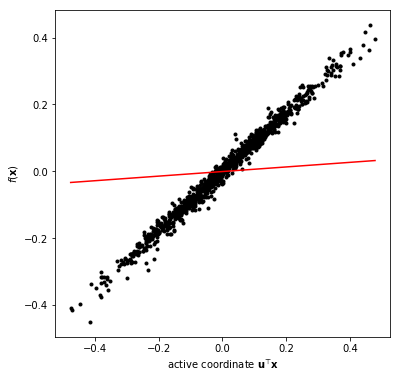

In [43]:
# try Polynomial Ridge Approximation
pra = psdr.PolynomialRidgeApproximation(degree = 1,subspace_dimension = 1)
pra.fit(X,CL)
pra.shadow_plot(X,CL)

In [29]:
np.linalg.norm(pra(X) - CL)/np.linalg.norm(CL)

0.10205088137533178

In [32]:
pra.U

array([[0.19016449],
       [0.18189605],
       [0.26306532],
       [0.31979908],
       [0.51965139],
       [0.17927019],
       [0.17645545],
       [0.26211463],
       [0.3141001 ],
       [0.50852889]])

In [35]:
dom2 = dom.add_constraints(A_eq = pra.U.T, b_eq = [0])
dom2.sample(1)

AssertionError: Starting point must be inside the domain